##### Angelica 
##### DSCI_V 100 008
## Project Planning Stage (Individual)


Loading packages and setting a seed for the entire notebook:

In [1]:
# attaching packages
library(tidyverse)
library(tidymodels)
library(dplyr)

# setting seed
set.seed(160)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Reading in both the players and sessions datasets:

In [2]:
# reading in players.csv dataset
players_data <- read_csv("https://raw.githubusercontent.com/angelicaa-p/project_planning_stage_individual/refs/heads/main/players.csv") 
# players_data - to ensure data frame is loaded correctly

# previewing the first 10 rows to save up notebook lines 
head(players_data, 10) 

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [3]:
# reading in sessions.csv dataset
sessions_data <- read_csv("https://raw.githubusercontent.com/angelicaa-p/project_planning_stage_individual/refs/heads/main/sessions.csv")
# sessions_data - to ensure data frame is loaded in correctly

# previewing the first 10 rows to save up notebook lines 
head(sessions_data, n = 10)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


## (1) Data Description

There are two datasets: players.csv (196 unique players) and sessions.csv (1,535 recorded play sessions). Both datasets are linked by the hashedEmail identifier.

### Closer look at players.csv dataset:
Notes:
- total number of variables/columns is quantified by visual inspection of the players_data tibble message - later confirmed using summary()
- total number of observations/rows is quantified by visual inspection of the players_data tibble message - later confirmed using summary()

#### General overview of the data
- Total number of observations (rows): 196
- Total number of variables (columns): 7
##### Table 1: Further information about variables

| Variable name    | Variable data type   | What do the variables mean                                                 | 
|:-----------------| --------------- | ------------------------------------------------------------------------------- | 
| experience       | chr (character) | describes experience / skill level                                              |
| subscribe        | lgl (logical)   | whether players are subscribed to or not to a game-related newsletter           |
| hashedEmail      | chr (character) | an anonymized unique identifier generated by hashing the user's email address<br> - this variable acts as a unique key linking players.csv and sessions.csv   |
| played_hours     | dbl (double)    | total time played (hours) for each unique player (identified by hashedEmail)    |
| name             | chr (character) | player’s display name, randomly generated and chosen by the player              |
| gender           | chr (character) | gender of the player                                                            |
| Age              | dbl (double)    | age of the player (years)                                                       |

#### Summary Statistics

Summary statistics will first be computed, after which the results will be presented in a structured table format.

A general summary computation of all the variables: 

In [4]:
summary(players_data)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

In [5]:
# finding NA entries in all variables
missing_entries <- players_data |>
                        summarize(across(experience:Age, ~sum(is.na(.))))
missing_entries

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,2


Notes:
- The age variable contains two missing entries (NAs)
 - Means cannot be computed for categorical variables

Using the general summary to further explore individual variables:

In [6]:
# experience variable summary statistics
experience_summary <- players_data |> 
                            group_by(experience) |>
                            summarize(count = n()) |> # summarizes frequency counts of each category
                            mutate(percentage = round((count / sum(count)) * 100, 2)) |> # expresses each category count as a percentage to the total count
                            arrange(desc(count))
experience_summary

experience,count,percentage
<chr>,<int>,<dbl>
Amateur,63,32.14
Veteran,48,24.49
Regular,36,18.37
Beginner,35,17.86
Pro,14,7.14


In [7]:
# subscribe variable summary statistics
subscribe_summary <- players_data |> 
                            group_by(subscribe) |>
                            summarize(count = n()) |> # summarizes frequency counts of each category
                            mutate(percentage = round((count / sum(count)) * 100, 2))  # expresses each category count as a percentage to the total count
subscribe_summary

subscribe,count,percentage
<lgl>,<int>,<dbl>
FALSE,52,26.53
TRUE,144,73.47


In [8]:
# played_hours summary statistics 
played_hours_summary <- players_data |>
  summarize(
    min_hours = min(played_hours, na.rm = TRUE), # finding the min number of hours played
    max_hours = max(played_hours, na.rm = TRUE), # finding the max number of hours played
    mean_hours = round(mean(played_hours, na.rm = TRUE), 2), # finding the mean of total hours played
  )
played_hours_summary

min_hours,max_hours,mean_hours
<dbl>,<dbl>,<dbl>
0,223.1,5.85


In [9]:
# gender summary statistics
gender_summary <- players_data |>
                    group_by(gender) |>
                    summarize(count = n()) |> # summarizes frequency counts of each category
                    mutate(percentage = round((count / sum(count)) * 100, 2)) |> # expresses each category count as a percentage to the total count
                    arrange(desc(count))
gender_summary

gender,count,percentage
<chr>,<int>,<dbl>
Male,124,63.27
Female,37,18.88
Non-binary,15,7.65
Prefer not to say,11,5.61
Two-Spirited,6,3.06
Agender,2,1.02
Other,1,0.51


In [10]:
# Age summary statistics
Age_summary_minMaxMean <- players_data |>
             summarize(
                min_Age = min(Age, na.rm = TRUE), # finding the min number for age
                max_Age = max(Age, na.rm = TRUE), # finding the max number of age
                mean_Age = round(mean(Age, na.rm = TRUE), 2), # finding the mean of all ages
              )   
Age_summary_minMaxMean

# finding the top 3 ages counts
Age_summary_top3_counts <- players_data |>
                                    group_by(Age) |>
                                    summarize(count = n()) |> 
                                    mutate(percentage = round((count / sum(count)) * 100, 2)) |>
                                    arrange(desc(count)) |>
                                    slice_head(n = 3)
Age_summary_top3_counts

min_Age,max_Age,mean_Age
<dbl>,<dbl>,<dbl>
9,58,21.14


Age,count,percentage
<dbl>,<int>,<dbl>
17,73,37.24
21,18,9.18
22,15,7.65


##### Table 2: Structured summary statistics for all variables of players.csv

| Variable name | Measurement Type  | Mean              | Other Summaries                                                                                    | Missing entries (NA's)   |
| ------------- | :----------------:| :---------------: | :------------------------------------------------------------------------------------------------: | :----------------------: |
| played_hours  | numerical         |  5.85             | Max. number of hours recorded for a player:<br>  223.10 <br><br>  Min. number of hours recorded for a player: <br> 0 | 0      |
| Age           | numerical         |  21.14            | Max. and min. ages recorded: <br> Max (58 y/o) <br> Min (9 y/o) <br><br> Top 3 most frequent ages by percentage:<br>  17 (37.24 %)<br>    21 (9.18 %)<br>    22 (7.65%)                                                                                                                                   | 2                        | 
| experience    | categorical       |       -           | Categories (5):<br> Amateur, Veteran, Regular, Beginner, Pro <br><br> Top 3 most frequent experience levels by percentage:<br> Amateur (32.14 %)<br> Veteran (24.49 %)<br> Regular (18.37 %)                                                                                                                 | 0                        |
| subscribe     | categorical       |       -           | Categories (logical values):<br> TRUE, FALSE<br><br>   Percentages:<br> TRUE (73.47 %)<br> FALSE (26.53 %)   | 0              |
| gender        | categorical       |       -           | Categories (7): <br> Male, Female, Non-binary, Prefer not to say, Two-Spirited, Agender, Other<br><br> Top 3 most commonly reported genders by percentage: <br> Male (63.27 %) <br>  Female (18.88 %) <br>  Non-binary (7.65 %)                                                                             | 0                         |
| hashedEmail   | identifier (string) |     -           |  Not applicable (unique identifier)                                                                | 0                         |
| name          | identifier (string) |     -           |  Not applicable (unique identifier)                                                                | 0                         |

#### Brief data interpretation of players.csv

Overall, the dataset contains 196 observations, each representing a unique player. Player characteristics are described across seven variables: experience, subscribe, hashedEmail, played_hours, name, gender, and age. From the summary statistics, it is clear that name and hashedEmail function solely as identifier variables, as each entry is unique and does not provide meaningful information for statistical analysis.<br>

The remaining variables show several general patterns: <br>
- Among the categorical variables, experience is distributed across five levels, with Amateur, Veteran, and Regular appearing as the most common categories.
- The subscribe variable shows that a majority of players have subscribed, with TRUE values making up most of the dataset.
- The gender variable has a diverse set of categories, though Male, Female, and Non-binary are the most frequently reported. <br>

The numerical variables also provide useful insight;  played_hours displays a wide range of engagement levels, and age shows most players fall within a younger demographic. Together, these patterns help form an initial understanding of player characteristics before conducting deeper analysis.




##### Potential issues:
- Two missing (NA) Age values are negligible and unlikely to affect summary statistics.
- Outliers in Age and played_hours may distort averages and influence modelling (regression lines and classification boundaries).
- Imbalanced categorical variables (e.g., gender, experience, subscribe) can lead to unreliable proportions and weak comparisons for small categories.

### Closer look at sessions.csv dataset:
Notes:
- total number of variables/columns is quantified by visual inspection of the sessions_data tibble message - later confirmed using summary()
- total number of observations/rows is quantified by visual inspection of the sessions_data tibble message - later confirmed using summary()

#### General overview of the data
- Total number of observations (rows): 1535
- Total number of variables (columns): 5
##### Table 3: Further information about sessions.csv variables

| Variable name       | Variable data type   | What do the variables mean                                                               | 
|:--------------------| -------------------- | -----------------------------------------------------------------------------------------| 
| hashedEmail         | chr (character)      | an anonymized unique identifier generated by hashing the user's email address<br> - this variable acts as a unique key linking players.csv and sessions.csv   |
| start_time          | chr (character)      | start time of a game session in DD/MM/YYYY HH:MM (24-hour) format                        |
| end_time            | chr (character)      | end time of a game session in DD/MM/YYYY HH:MM (24-hour) format                          |
| original_start_time | dbl (double)         | start time of a game session in UNIX milliseconds                                        |
| original_end_time   | dbl (double)         | start time of a game session in UNIX milliseconds                                        |

#### Summary statistics

Summary statistics will first be computed, after which the results wili be presented in a structured table format.

A general summary computation of all the variables:

In [11]:
summary(sessions_data)

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

In [12]:
# finding NA entries in all variables
missing_entries2 <- sessions_data |>
                        summarize(across(hashedEmail:original_end_time, ~sum(is.na(.))))
missing_entries2

hashedEmail,start_time,end_time,original_start_time,original_end_time
<int>,<int>,<int>,<int>,<int>
0,0,2,0,2


notes: 
- The end_time and original_end_time variables have two missing entries (NAs)
- The dataset does not contain any categorical variables; it consists entirely of identifiers and time-related numeric variables

Using the general summary to further explore individual variables:

In [13]:
# using hashedEmail to find the number of sessions per player
hashedEmail_sessions_per_player <- sessions_data |>
                                        group_by(hashedEmail) |>
                                        summarize(count = n()) |>
                                        arrange(desc(count)) 
# hashedEmail_sessions_per_player - to make sure everything loaded correctly

head(hashedEmail_sessions_per_player, n = 15) # preview the top 15 players with the most sessions to save notebook lines

# finding the mean, max, and min number of sessions 
hashedEmail_mean_sessions <- hashedEmail_sessions_per_player |>
                                        summarize(
                                            mean_sessions = mean(count),
                                            max_sessions = max(count),
                                            min_sessions = min(count)
                                                 )    

hashedEmail_mean_sessions

# finding the number of unique players based on hashedEmail
unique_hashedEmails_count <- sessions_data |> 
                                      summarize(unique_players = n_distinct(hashedEmail))
unique_hashedEmails_count

hashedEmail,count
<chr>,<int>
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,310
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,219
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,159
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,147
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,130
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,95
24d4892c2c3ce11d3e54c3bf31ee218901cac7a2f564911d67424c8fdf0874fe,79
e74c60a92c0100e7240be56d66969db85856152b048c639331a3595f901461ae,47
18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3,41


mean_sessions,max_sessions,min_sessions
<dbl>,<int>,<int>
12.28,310,1


unique_players
<int>
125


Both original_start_time and original_end_time will be used together to calculate durations:

In [14]:
# calculating durations by taking the difference betweeen original_end_time and original_start_time
original_time_durations <- sessions_data |>
                              select(original_start_time, original_end_time) |>
                              mutate(
                                    start_sec = original_start_time / 1000,  # convert from milliseconds to seconds
                                    end_sec   = original_end_time / 1000,
                                    duration_sec = end_sec - start_sec,   # duration in seconds
                                    duration_hours = round(duration_sec / 3600, 2)  # duration in hours
                                   ) |>
                              arrange(desc(duration_sec), desc(duration_hours))

head(original_time_durations, n = 10) # preview the top 10 longest session durations to save notebook lines

# summary statistics for session duration
original_time_duration_summaries <- original_time_durations |>
                                         summarize(
                                                    min_duration_hours = round(min(duration_hours, na.rm = TRUE), 2),  # finding min duration in hours
                                                    max_duration_hours = round(max(duration_hours, na.rm = TRUE), 2),  # finding max duration in hours
                                                    mean_duration_hours = round(mean(duration_hours, na.rm = TRUE), 2)  # finding the mean duration in hours
                                                  )
original_time_duration_summaries

original_start_time,original_end_time,start_sec,end_sec,duration_sec,duration_hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.71976e+12,1.71978e+12,1719760000,1719780000,20000,5.56
1.71987e+12,1.71989e+12,1719870000,1719890000,20000,5.56
1.72489e+12,1.72491e+12,1724890000,1724910000,20000,5.56
1.72266e+12,1.72268e+12,1722660000,1722680000,20000,5.56
1.72505e+12,1.72507e+12,1725050000,1725070000,20000,5.56
1.72272e+12,1.72274e+12,1722720000,1722740000,20000,5.56
1.71969e+12,1.71971e+12,1719690000,1719710000,20000,5.56
1.72185e+12,1.72187e+12,1721850000,1721870000,20000,5.56
1.71585e+12,1.71587e+12,1715850000,1715870000,20000,5.56


min_duration_hours,max_duration_hours,mean_duration_hours
<dbl>,<dbl>,<dbl>
0,5.56,0.81


##### Table 4: Structured summary statistics for all variables of sessions.csv

| Variable name       | Measurement Type      | Mean              | Other Summaries                                       | Missing entries (NA's)   |
| ------------------- | :--------------------:| :---------------: | :---------------------------------------------------: | :----------------------: |
|original_start_time  | numeric (UNIX ms)     |  -                | Used to compute session start datetime                | 0                        |
| original_end_time   |numeric (UNIX ms)      |  -                | Used to compute session end datetime                  | 2                        | 
| start_time          | character (timestamp) |  -                | Human-readable start time, not used for calculations  | 0                        |
| end_time            | character (timestamp) |  -                | Human-readable end time, not used for calculations    | 2                        |
| hashedEmail         | identifier (string)   |  -                | 125 unique players represented across 1,535 sessions  | 0                        |                                                      
| duration_hours      | numeric (hours)       | Mean ≈ 0.81 hrs   | Min = 0 hrs <br> Max = 5.56 hrs                       | 0                        |
| sessions_per_player | numeric (count)       | Mean ≈ 12.28      | Min = 1 <br> Max = 310 <br> shows player engagement frequency | 0                        |

#### Brief data interpretation of sessions.csv

The sessions.csv dataset contains 1,535 recorded gameplay sessions identified by hashedEmail values. A total of 125 unique hashedEmail identifiers appear in this file, which is notably fewer than the 195 players listed in players.csv. This mismatch may indicate that not all players recorded in players.csv have corresponding session records, meaning some players never logged a session during the data-collection time frames. The sessions dataset may include repeated session activity due to highly active players, explaining why the total number of sessions is much larger than the number of unique players in this file.

Since hashedEmail acts as anonymous identifier across both datasets, it can now be used for summary statistics such as counting sessions per player; unlike in players.csv, where it served only as a unique identifier. Overall, sessions.csv provides insight into player activity levels, session durations, and engagement patterns that pair well with the demographic information in players.csv.

##### Potential issues:
- Missing end_time values prevent duration calculation for corresponding sessions, which may slightly influence summary statistics (mean or max session duration).
- Inconsistent representation of players across datasets: sessions.csv contains 125 unique hashedEmail values, while players.csv contains 196 players. This mismatch means many players in players.csv have no recorded sessions, and many sessions belong to players not represented in players.csv. This can introduce bias if models assume matching populations or require joined datasets.
- Outliers in session duration: Extremely short or long sessions can distort averages and regression lines. Duration-based predictors may become unstable unless outliers are handled or transformed.

## (2) Question

The broad question I will address is: 

**Question 2:** We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

Based on this broad question, the specifc question I have formulated is:

Can player characteristics such as experience level, age, gender, and subscription status predict how much time a player spends playing (total played hours)?

##### How the data will help answer this question:

I will be using the players.csv dataset, as it provides the response variable played_hours along with the explanatory variables relevant to my research question: experience level, age, gender, and subscription status. These variables capture demographic and behavioral characteristics that may influence a player’s engagement. Based on visual inspection the data appears tidy, as it follows the three key criteria: each row corresponds to one player, each column represents a single variable, and all values are stored in individual cells. Before modeling, the categorical predictors (experience, gender, and subscribe) will be converted to factor data types so that R appropriately treats them as categorical variables. The response variable (played_hours) and the numerical explanatory variable (age) are already in suitable numeric form for modeling.

## (3) Exploratory Data Analysis and Visualization

##### Table 5: Mean values of quantitative variables in players.csv

The dataset contains two numeric variables relevant for mean-based summary statistics as computed previously:

| Variable             | Mean        |
| -------------------- | ----------- |
| played_hours         | 5.85 hours  |
| Age                  | 21.14 y/o   | <br>

#### Exploratory visualizations

Before beginning visual explorations, it is important to note that the players.csv dataset is already in tidy format. Although additional wrangling such as converting categorical variables to factors may be beneficial for modelling, these changes are not required at this stage and will be carried out during the modelling phase.

##### Plot 1: Scatterplot of played_hours vs Age variables

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 30
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


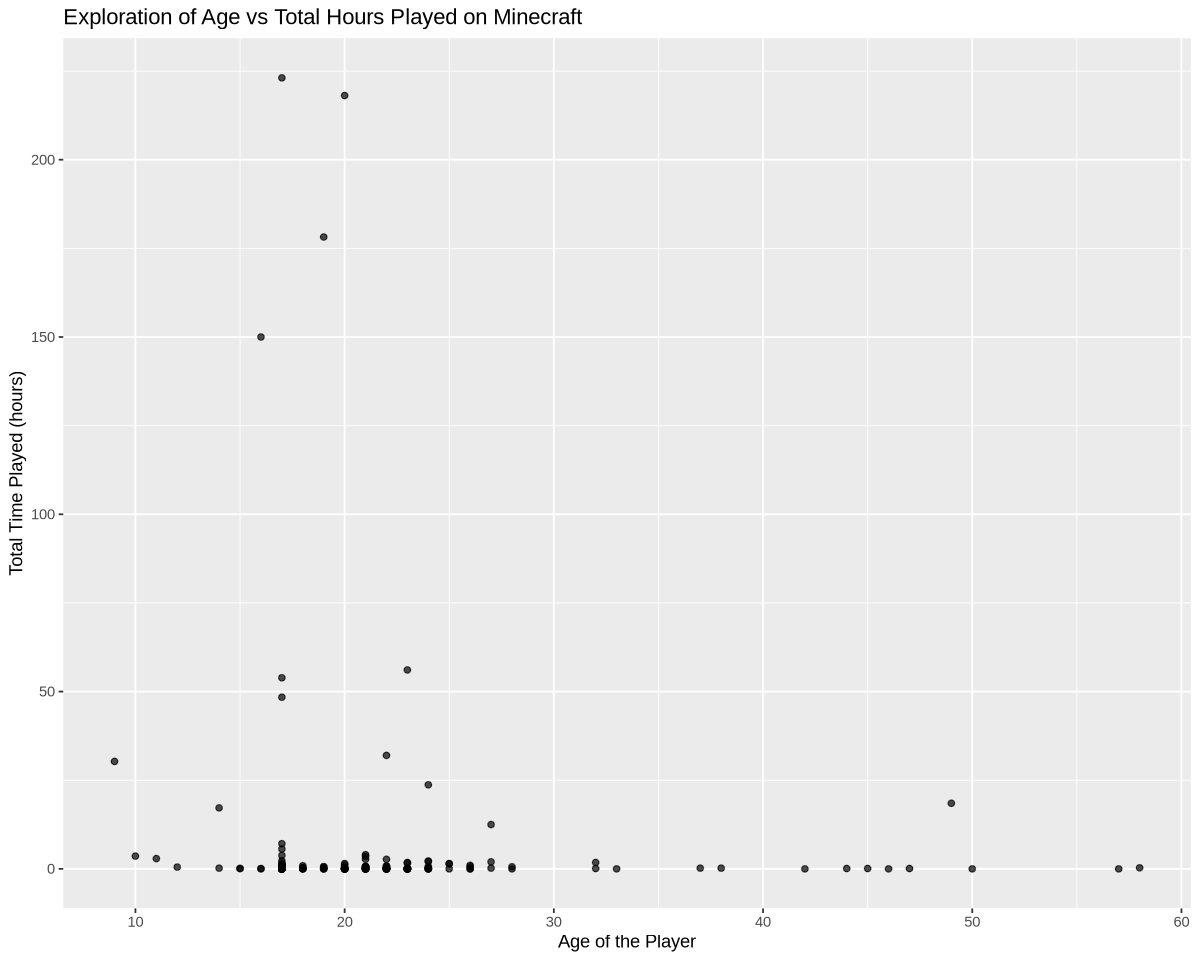

In [26]:
options(repr.plot.width = 10, repr.plot.height = 8)

hours_vs_age_plot <- players_data |>
    ggplot(aes(x = Age, y = played_hours)) +
        geom_point(alpha = 0.7) +
        scale_y_continuous() +
        labs(x = "Age of the Player",
             y = "Total Time Played (hours)",
             title = "Exploration of Age vs Total Hours Played on Minecraft")
        theme(text = element_text(size = 30))

hours_vs_age_plot